# Handwritten Digit Prediction [MNIST Dataset]

## Installing Dependencies

In [8]:
! pip install tensorflow scikit-learn pandas matplotlib seaborn numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mainp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Code

### Importing Libraries

In [9]:
# importing required libraries

import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import fetch_openml

# perfromance metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# preprocessing
from sklearn.model_selection import train_test_split

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


### Loading the MNIST Dataset

In [10]:
# loading the mnist dataset from openml
mnist = fetch_openml('mnist_784', as_frame=False)
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

### Data Preprocessing

In [11]:
# check the shape of the dataset
print("Shape of the dataset: ", mnist.data.shape)

Shape of the dataset:  (70000, 784)


In [12]:
# scaling the data
mnist.data = mnist.data / 255.0

In [13]:
# splitting the dataset into dependent and independent variables
# X is the independent variable
# y is the dependent variable

X, y = mnist['data'], mnist['target']

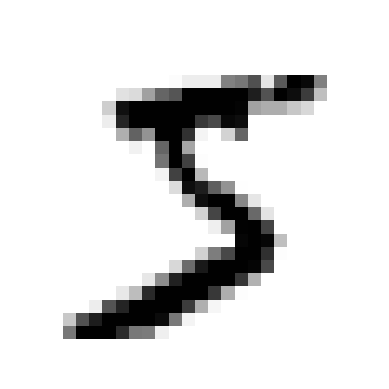

In [14]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

### Splitting the Dataset into Training and Testing Sets

In [15]:
# splitting the dataset into training and testing sets
# train_images is the training set for the images
# train_labels is the training set for the labels
# test_images is the testing set for the images
# test_labels is the testing set for the labels

train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Evaluating the Model

#### KNN Algorithm

In [16]:
# training the classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_images, train_labels)

KNeighborsClassifier()

In [17]:
# testing the model
predicted_test_lables = knn_clf.predict(test_images)

In [18]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   17 1323    1    4    1    5   17    3    2]
 [   0    2   12 1384    1    8    2    7    7   10]
 [   3    8    1    0 1251    0    2    3    1   26]
 [   2    5    0   16    2 1232   13    0    1    2]
 [   5    1    0    0    5    6 1379    0    0    0]
 [   1   21    4    0    4    0    0 1458    1   14]
 [   4   13    6   22    2   19    4   10 1267   10]
 [   6    5    2   11   19    0    0   17    1 1359]]
Accuracy:  0.9700714285714286
Precision:  0.9706552322744569
Recall:  0.9696706936506783
F1 Score:  0.9700278648171

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97     

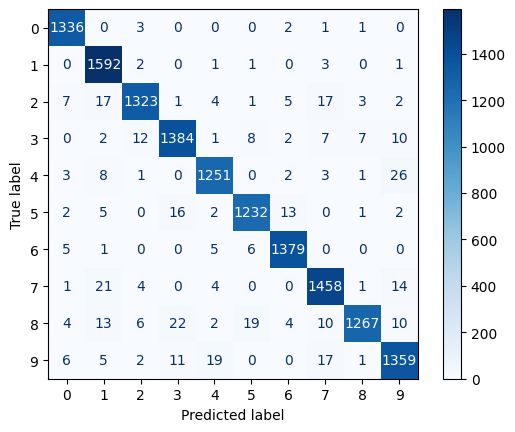

In [19]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### SVM Algorithm

In [20]:
# training the classifier
svm_clf = SVC()
svm_clf.fit(train_images, train_labels)

SVC()

In [21]:
# testing the model
predicted_test_lables = svm_clf.predict(test_images)

In [22]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    2    0    0    4    2    0]
 [   3    4 1348    2    3    2    4    8    5    1]
 [   0    2   11 1386    2   11    1    9    7    4]
 [   1    0    2    0 1269    0    3    2    2   16]
 [   0    1    2   15    2 1236    9    1    7    0]
 [   1    0    0    0    4    4 1384    0    3    0]
 [   1    6   12    1    5    1    0 1465    1   11]
 [   2    6    8   12    4    9    6    4 1303    3]
 [   5    8    2    8   14    2    0   11    5 1365]]
Accuracy:  0.9764285714285714
Precision:  0.9763608291708306
Recall:  0.9762666612492419
F1 Score:  0.9762962373195112

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98  

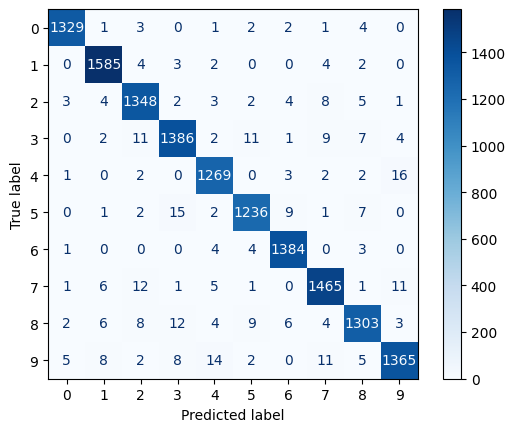

In [23]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### Logistic Regression Algorithm

In [24]:
# training the classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(train_images, train_labels)

RandomForestClassifier()

In [25]:
# testing the model
predicted_test_lables = rf_clf.predict(test_images)

In [26]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[1324    0    5    1    1    2    3    2    5    0]
 [   0 1575    6    8    3    0    0    6    2    0]
 [   5    2 1340    3    6    1    8    7    8    0]
 [   1    0   20 1366    1    8    2   15   13    7]
 [   2    0    3    0 1254    0    5    3    2   26]
 [   2    3    3   18    3 1220    9    1   13    1]
 [   3    1    1    0    6    9 1373    0    3    0]
 [   2    6   18    0    5    1    0 1454    3   14]
 [   1    8   11   16    5   12    4    7 1283   10]
 [   5    7    2   14   19    6    1   10    8 1348]]
Accuracy:  0.9669285714285715
Precision:  0.96674516198586
Recall:  0.9666879445271354
F1 Score:  0.9666944588960054

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97    

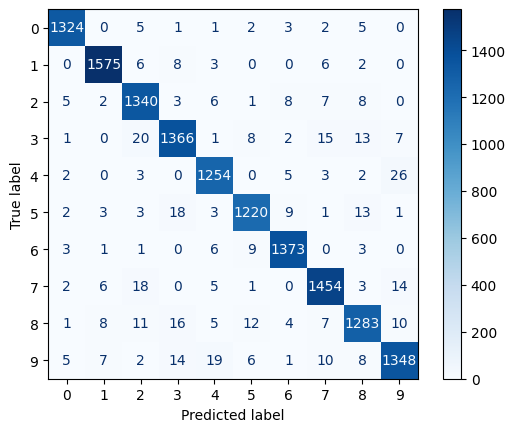

In [27]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### Naive Bayes Algorithm

In [28]:
# training the classifier
nb_clf = GaussianNB()
nb_clf.fit(train_images, train_labels)

GaussianNB()

In [29]:
# testing the model
predicted_test_lables = nb_clf.predict(test_images)

In [30]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]
Accuracy:  0.5515714285714286
Precision:  0.6732598877071705
Recall:  0.5414664953557429
F1 Score:  0.4963880342404493

Classification Report: 


              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000



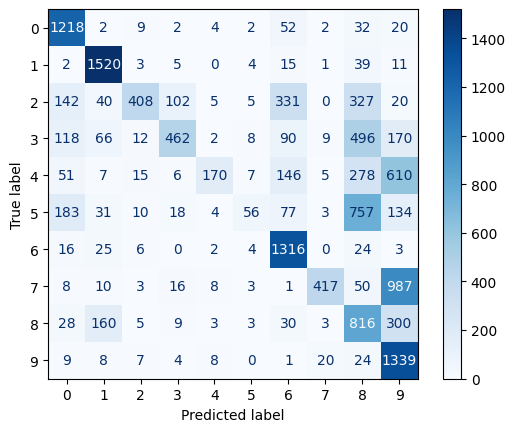

In [31]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### Random Forest Algorithm

In [32]:
# training the classifier
lr_clf = LogisticRegression()
lr_clf.fit(train_images, train_labels)

C:\Users\mainp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# testing the model
predicted_test_lables = lr_clf.predict(test_images)

In [34]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[1289    1    4    0    5   18   12    5    7    2]
 [   0 1552    6    9    2   14    0    3   12    2]
 [   4   21 1232   23   16   11   17   16   31    9]
 [   7    8   32 1284    1   44    4   15   21   17]
 [   5    1    7    4 1203    5   12    8    8   42]
 [   6   12    7   41   11 1129   18    4   31   14]
 [   5    4   17    1   14   18 1333    1    3    0]
 [   5    4   25    3    9    6    0 1417    2   32]
 [  10   26   15   43    7   39   10   10 1180   17]
 [   7   11    6   14   42    8    0   49   18 1265]]
Accuracy:  0.9202857142857143
Precision:  0.9194462307976439
Recall:  0.919246882946625
F1 Score:  0.9192761188007242

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93   

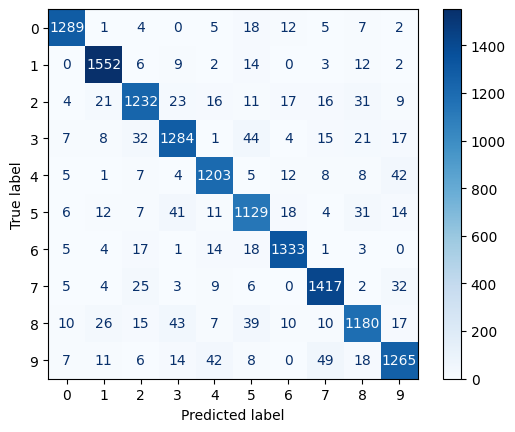

In [35]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
